In [1]:
from SYK_fft import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from ConformalAnalytical import *

In [2]:
Nbig = int(2**19)
err = 1e-3

beta = 200
mu = 0.
g = 0.5
J = 0.
phase = np.pi/2
lamb = 0. * np.exp(1.0j * phase)
alpha = 1.0
r = 1.
kappa = 1. 


omega = (2 * np.arange(Nbig) - Nbig + 1) * np.pi/beta
nu = (2 * np.arange(Nbig) - Nbig ) * np.pi/beta
tau = (np.arange(Nbig) + 1./2) * beta/Nbig

In [3]:
GDtau = Time2FreqF(GconfImag(omega,g,beta),Nbig,beta)
GODtau = 0.5*np.zeros(Nbig)
DDtau = Time2FreqB(DconfImag(omega,g,beta),Nbig,beta)
DODtau = 0.5*np.zeros(Nbig)
omegar2 = ret_omegar2(g,beta)

itern = 0
diff = 1
x = 0.5
xGD, xGOD, xDD, xDOD = (0.5,0.5,0.5,0.5)
diffGD, diffGOD, diffDD, diffDOD = (1.,1.,1.,1.)

while(diff>err):
    itern+=1
    diffoldGD = diffGD
    diffoldGOD = diffGOD
    diffoldDD = diffDD
    diffoldDOD = diffDOD
    
    oldGDtau = 1.0*GDtau
    oldGODtau = 1.0*GODtau
    oldDDtau = 1.0*DDtau
    oldDODtau = 1.0*DODtau
    
    oldGDomega = Time2FreqF(oldGDtau,Nbig,beta)
    oldGODomega = Time2FreqF(oldGODtau,Nbig,beta)
    oldDDomega = Time2FreqB(oldDDtau,Nbig,beta)
    oldDODomega = Time2FreqB(oldDODtau,Nbig,beta)
    
    SigmaDtau = 1.0*kappa * (g**2) * DDtau * GDtau 
    SigmaODtau = 1.0*kappa * (g**2) * DODtau * GODtau
    PiDtau = 2.0 * g**2 * GDtau * GDtau[::-1]
    PiODtau = 2.0 * g**2 * GODtau * GODtau[::-1]
    
    SigmaDomega = Time2FreqF(SigmaDtau,Nbig,beta)
    SigmaODomega = Time2FreqF(SigmaODtau,Nbig,beta)
    PiDomega =  Time2FreqB(PiDtau,Nbig,beta)
    PiODomega = Time2FreqB(PiODtau,Nbig,beta)
    
    # if itern < 15:
    #     PiDomega[Nbig//2] = 1.0*r - omegar2
    PiDomega[Nbig//2] = 1.0*r - omegar2
    
    detGmat = (1j*omega - mu - SigmaDomega)**2 - (np.abs(lamb)+SigmaODomega)**2
    detDmat = (nu**2 + r - PiDomega)**2 - (J + PiODomega)**2
    
    GDomega = xGD*((1j*omega - mu - SigmaDomega)/detGmat) + (1-xGD)*oldGDomega
    GODomega = xGOD*((np.abs(lamb) + SigmaODomega)/detGmat) + (1-xGOD)*oldGODomega
    DDomega = xDD*((nu**2 + r - PiDomega)/detDmat) + (1-xDD)*oldDDomega
    DODomega = xDOD*((J + PiODomega)/detDmat) + (1-xDOD)*oldDODomega
    
    
    GDtau = Freq2TimeF(GDomega,Nbig,beta)
    GODtau = Freq2TimeF(GODomega,Nbig,beta)
    DDtau = Freq2TimeB(DDomega,Nbig,beta)
    DODtau = Freq2TimeB(DODomega,Nbig,beta)
    
    diffGD = np. sqrt((1.0/Nbig) * np.sum((np.abs(GDtau-oldGDtau))**2))
    diffGOD = np. sqrt((1.0/Nbig) * np.sum((np.abs(GODtau-oldGODtau))**2))
    diffDD = np. sqrt((1.0/Nbig) * np.sum((np.abs(DDtau-oldDDtau))**2))
    diffDOD = np. sqrt((1.0/Nbig) * np.sum((np.abs(DODtau-oldDODtau))**2))
    diff = np.max([diffGD, diffGOD, diffDD, diffDOD])
    
    if diffGD>diffoldGD:
        xGD/=2.
    if diffGOD>diffoldGOD:
        xGOD/=2.
    if diffDD>diffoldDD:
        xDD/=2.
    if diffDOD>diffoldDOD:
        xDOD/=2.
    print("itern = ",itern, " , diff = ", diffGD, diffGOD, diffDD, diffDOD , end = '\r')



    

    

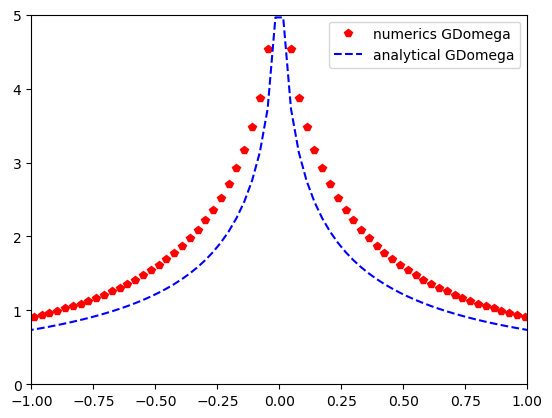

In [4]:
GDconfomega = GconfImag(omega,g,beta)
plt.plot(omega, np.abs(GDomega), 'rp', label = 'numerics GDomega')
plt.plot(omega, np.abs(GDconfomega), 'b--', label = 'analytical GDomega' )
plt.ylim(0,5)
plt.xlim(-1,1)
plt.legend()

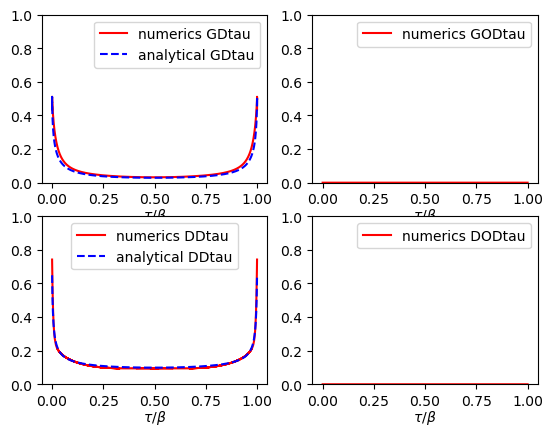

In [5]:
GDconftau = Freq2TimeF(GconfImag(omega,g,beta),Nbig,beta)
DDconftau = Freq2TimeB(DconfImag(nu,g,beta),Nbig,beta)

fig, ax = plt.subplots(2,2)

ax[0,0].plot(tau/beta, np.abs(GDtau), 'r', label = 'numerics GDtau')
ax[0,0].plot(tau/beta, np.abs(GDconftau), 'b--', label = 'analytical GDtau' )
ax[0,0].set_ylim(0,1)
ax[0,0].set_xlabel(r'$\tau/\beta$',labelpad = 0)
ax[0,0].legend()

ax[0,1].plot(tau/beta, np.abs(GODtau), 'r', label = 'numerics GODtau')
ax[0,1].set_ylim(0,1)
ax[0,1].set_xlabel(r'$\tau/\beta$',labelpad = 0)
ax[0,1].legend()

ax[1,0].plot(tau/beta, np.abs(DDtau), 'r', label = 'numerics DDtau')
ax[1,0].plot(tau/beta, np.abs(DDconftau), 'b--', label = 'analytical DDtau' )
ax[1,0].set_ylim(0,1)
ax[1,0].set_xlabel(r'$\tau/\beta$',labelpad = 0)
ax[1,0].legend()

ax[1,1].plot(tau/beta, np.abs(DODtau), 'r', label = 'numerics DODtau')
ax[1,1].set_ylim(0,1)
ax[1,1].set_xlabel(r'$\tau/\beta$',labelpad = 0)
ax[1,1].legend()



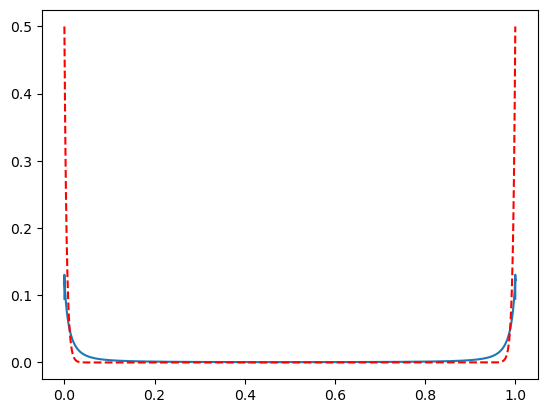

In [6]:
plt.plot(tau/beta,np.real(PiDtau))
plt.plot(tau/beta,DfreeImagtau(tau,r,beta),'r--')


slope of fit = -0.250
slope of ES solution = -0.159


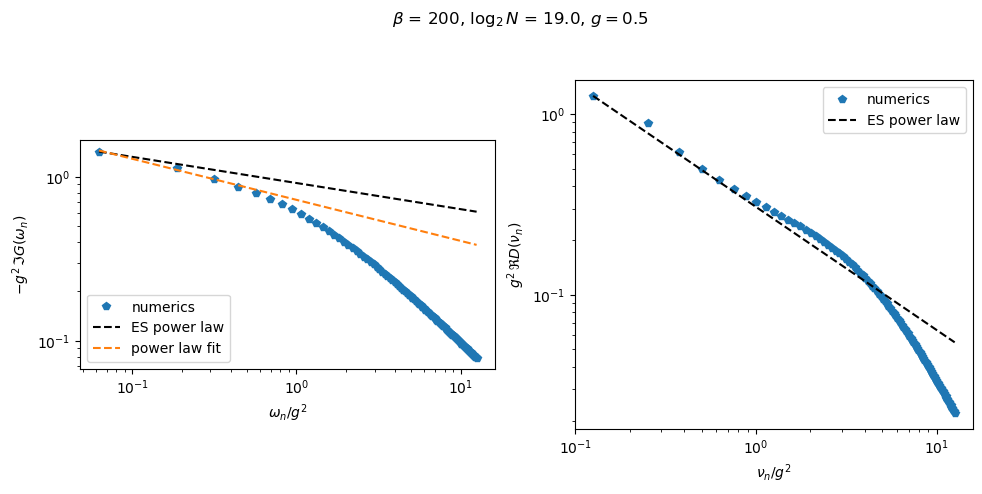

In [7]:
start, stop = Nbig//2, Nbig//2 + 100
startB, stopB = Nbig//2 + 1, Nbig//2 + 101 
delta = 0.420374134464041
#delta = 0.116902
alt_delta = 0.116902  

fitGD_val = -np.imag(GDomega[start])*(g**2)
#fitG_val = -np.imag(Gconf[start])*(g**2)
conf_fit_GD = 1 * np.abs(omega/(g**2))**(2*delta - 1)
conf_fit_GD = conf_fit_GD/conf_fit_GD[start] * fitGD_val
alt_conf_fit_GD = fitGD_val * np.abs(omega/(g**2))**(2*alt_delta - 1)

fitDD_val = np.real(DDomega[startB])*(g**2)
#fitD_val = np.real(Dconf[startB])
conf_fit_DD = 1 * np.abs(nu[startB:stopB]/(g**2))**(1-4*delta)
conf_fit_DD = conf_fit_DD/conf_fit_DD[0] * fitDD_val
alt_conf_fit_DD = 1 * np.abs(nu[startB:]/(g**2))**(1-4*alt_delta)

fitslice = slice(start, start + 4)
m,c = np.polyfit(np.log(omega[fitslice]/g**2), np.log(-np.imag(GDomega[fitslice])*(g**2)),1)
print(f'slope of fit = {m:.03f}')
print(f'slope of ES solution = {(2*delta - 1):.03f}')

fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_figwidth(10)
titlestring = r'$\beta$ = ' + str(beta) + r', $\log_2{N}$ = ' + str(np.log2(Nbig)) + r', $g = $' + str(g)
fig.suptitle(titlestring)
fig.tight_layout(pad=2)

ax1.loglog(omega[start:stop]/(g**2), -np.imag(GDomega[start:stop])*(g**2),'p',label = 'numerics')
ax1.loglog(omega[start:stop]/(g**2), conf_fit_GD[start:stop],'k--',label = 'ES power law')
ax1.loglog(omega[start:stop]/(g**2), np.exp(c)*(omega[start:stop]/(g**2))**m, '--', label = 'power law fit')
#ax1.loglog(omega[start:]/(g**2), -np.imag(Gconf[start:])*(g**2),'m.',label = 'ES solution')
#ax1.loglog(omega[start:]/(g**2), alt_conf_fit_GD[start:],'g--', label = 'alt power law')
#ax1.set_xlim(omega[start]/2,omega[start+15])
#ax1.set_ylim(1e-1,1e1)
ax1.set_xlabel(r'$\omega_n/g^2$')
ax1.set_ylabel(r'$-g^2\,\Im{G(\omega_n)}$')
ax1.set_aspect('equal', adjustable='box')
#ax1.axis('square')
ax1.legend()


ax2.loglog(nu[startB:stopB]/(g**2), np.real(DDomega[startB:stopB])*(g**2),'p',label='numerics')
ax2.loglog(nu[startB:stopB]/(g**2), conf_fit_DD,'k--',label = 'ES power law')
#ax2.loglog(nu[startB:]/(g**2), np.real(Dconf[startB:]),'m.',label = 'ES solution')
#ax2.loglog(nu[startB:]/(g**2), alt_conf_fit_D,'g--', label = 'alt power law')
#ax2.set_xlim(nu[startB]/2,nu[startB+15])
#ax2.set_ylim(5e-1,100)
ax2.set_xlabel(r'$\nu_n/g^2$')
ax2.set_ylabel(r'$g^2\,\Re{D(\nu_n)}$',labelpad = None)
ax2.set_aspect('equal', adjustable='box')
ax2.legend()



# ax2.loglog(nu[startB:]/(g), np.real(DDomega[startB:])*(g**2),'p',label='numerics')
# ax2.loglog(nu[startB:]/(g), conf_fit_DD*g,'k--',label = 'ES power law')
# #ax2.loglog(nu[startB:]/(g**2), np.real(Dconf[startB:]),'m.',label = 'ES solution')
# #ax2.loglog(nu[startB:]/(g**2), alt_conf_fit_D,'g--', label = 'alt power law')
# #ax2.set_xlim(nu[startB]/2,nu[startB+15])
# #ax2.set_ylim(5e-1,100)
# ax2.set_xlabel(r'$\nu_n/g^2$')
# ax2.set_ylabel(r'$g^2\,\Re{D(\nu_n)}$',labelpad = None)
# ax2.set_aspect('equal', adjustable='box')
# ax2.legend()

In [8]:
nu[Nbig//2 + 1]/g**2, omega[Nbig//2 + 1]/g**2

(0.12566370614359174, 0.18849555921538758)

In [9]:
2*np.pi/beta

0.031415926535897934

In [10]:
beta**2/(2*np.pi*Nbig)

0.012142558524467113